In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

ny = pd.read_csv('NewYork.csv')
ny.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BusinessType,BankName,BankStreet,BankCity,BankState,...,subpgmdesc,InitialInterestRate,TermInMonths,NaicsCode,NaicsDescription,LoanStatus,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported
0,CHRISTOPHER JAMES BENTLEY,492 Wendel Avenue,BUFFALO,NY,14223,INDIVIDUAL,"Zions Bank, A Division of",1 S Main St,SALT LAKE CITY,UT,...,FA$TRK (Small Loan Express),9.15,67,811122.0,Automotive Glass Replacement Shops,CHGOFF,1/4/16,11987,1,4
1,"CORK ON THE FORK, LLC",1 EAST CHURCH ST,FAIRPORT,NY,14450,CORPORATION,Xceed Financial FCU,888 N Nash St,EL SEGUNDO,CA,...,Guaranty,6.00,300,722110.0,Full-Service Restaurants,PIF,NaN,0,0,1
2,Spa Ciel De NY Corp.,159 West 23RD ST,NEW YORK,NY,10011,CORPORATION,Woori America Bank,330 5th Avenue 3rd Floor,NEW YORK CITY,NY,...,Guaranty,6.25,120,812113.0,Nail Salons,COMMIT,NaN,0,0,8
3,WJC Cleaners Inc.,1089 3RD AVE,NEW YORK,NY,10065,CORPORATION,Woori America Bank,330 5th Avenue 3rd Floor,NEW YORK CITY,NY,...,Guaranty,6.75,120,812320.0,Drycleaning and Laundry Services (except Coin-...,EXEMPT,NaN,0,0,4
4,"11 W 32, INC.","11 WEST 32ND STREET, 3&4 FL",NEW YORK,NY,10001,CORPORATION,Woori America Bank,330 5th Avenue 3rd Floor,NEW YORK CITY,NY,...,Guaranty,6.25,108,722410.0,Drinking Places (Alcoholic Beverages),EXEMPT,NaN,0,0,5


In [3]:
ny = ny.dropna()

In [5]:
X = ny[["TermInMonths" ]]
y = ny["RevolverStatus"].values.reshape(-1, 1)
print(X.shape, y.shape)

(709, 1) (709, 1)


In [6]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["TermInMonths"])
data_binary_encoded.head()

,TermInMonths_0,TermInMonths_1,TermInMonths_2,TermInMonths_3,TermInMonths_4,TermInMonths_5,TermInMonths_6,TermInMonths_7,TermInMonths_8,TermInMonths_9,...,TermInMonths_120,TermInMonths_121,TermInMonths_126,TermInMonths_129,TermInMonths_150,TermInMonths_159,TermInMonths_180,TermInMonths_219,TermInMonths_221,TermInMonths_296
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
451,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
ny.corr()

,BorrZip,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,NaicsCode,GrossChargeOffAmount,RevolverStatus,JobsSupported
BorrZip,1.000000,-0.315497,0.003707,0.008740,-0.032970,-0.308421,-0.067363,-0.110750,-0.017762,-0.070605,0.103516
BankZip,-0.315497,1.000000,-0.088407,-0.073951,-0.096526,0.220340,0.162456,0.162041,-0.082645,-0.026138,-0.051989
GrossApproval,0.003707,-0.088407,1.000000,0.985021,-0.026174,-0.301004,0.105290,-0.048117,0.958052,-0.192988,0.386361
SBAGuaranteedApproval,0.008740,-0.073951,0.985021,1.000000,-0.030232,-0.277831,0.151803,-0.031726,0.937739,-0.213160,0.352948
ApprovalFiscalYear,-0.032970,-0.096526,-0.026174,-0.030232,1.000000,-0.038482,0.194324,0.042775,0.022176,0.031515,-0.094306
InitialInterestRate,-0.308421,0.220340,-0.301004,-0.277831,-0.038482,1.000000,-0.022802,0.050541,-0.286687,0.106294,-0.192279
TermInMonths,-0.067363,0.162456,0.105290,0.151803,0.194324,-0.022802,1.000000,0.144655,0.136833,-0.156641,-0.044162
NaicsCode,-0.110750,0.162041,-0.048117,-0.031726,0.042775,0.050541,0.144655,1.000000,-0.048116,-0.158343,0.004111
GrossChargeOffAmount,-0.017762,-0.082645,0.958052,0.937739,0.022176,-0.286687,0.136833,-0.048116,1.000000,-0.151741,0.371561
RevolverStatus,-0.070605,-0.026138,-0.192988,-0.213160,0.031515,0.106294,-0.156641,-0.158343,-0.151741,1.000000,-0.047458


In [17]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

X_train.head()

,TermInMonths
20573,16
12928,29
1063,39
18705,54
15278,31


In [18]:
y_train

array([[1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
    

In [19]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [20]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [21]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["TermInMonths"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["TermInMonths"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

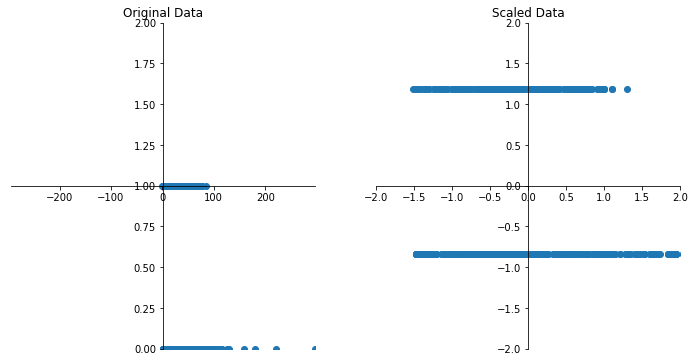

In [22]:
plt.show()